Sean Enderby and Zlatko Baracskai. &ldquo;Harmonic Instability of Digital Soft Clipping Algorithms.&rdquo; In <i>Proceedings of the 15<sup>th</sup> Int. Conference on Digital Audio Effects (DAFx-12)</i>. York, UK. September 17&ndash;21, 2012.

In [1]:
using Plots
pyplot();
versioninfo()

Julia Version 1.5.1
Commit 697e782ab8 (2020-08-25 20:08 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: Intel(R) Core(TM) i5-10400 CPU @ 2.90GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-9.0.1 (ORCJIT, skylake)
Environment:
  JULIA_EDITOR = "C:\Users\marui\AppData\Local\Programs\Microsoft VS Code\Code.exe"
  JULIA_NUM_THREADS = 


In [2]:
x = range(-1, stop=+1, length=256);

## Hyperbolic Tangent Soft Clipping (Tanh)

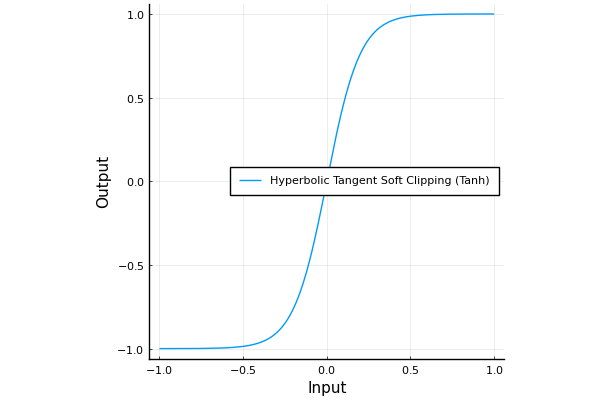

In [3]:
y = tanh.(5x);
plot(x, y,
    xlabel="Input", ylabel="Output", aspectratio=1,
    label="Hyperbolic Tangent Soft Clipping (Tanh)")

## Sinusoidal Soft Clipping

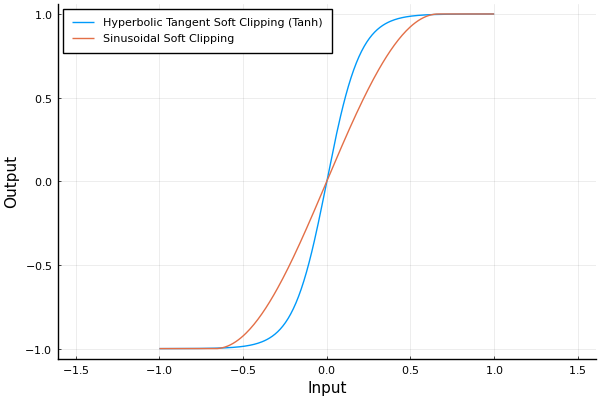

In [4]:
y = zero(x)
for n = 1:length(x)
    if abs.(x[n]) > 2/3
        y[n] = sign.(x[n]);
    else
        y[n] = sin.(3pi/4 * x[n]);
    end
end
plot!(x, y,
    xlabel="Input", ylabel="Output", aspectratio=1,
    label="Sinusoidal Soft Clipping")

## Exponential Soft Clipping

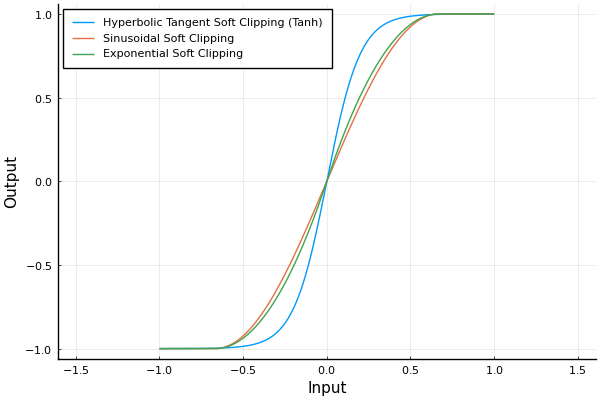

In [5]:
E = 2;
y = zero(x);
for n = 1:length(x)
    if abs.(x[n]) > 2/3
        y[n] = sign.(x[n]);
    else
        y[n] = sign.(x[n]) * (1 - abs.(3*x[n]/2 - sign.(x[n])) .^ E);
    end
end
plot!(x, y,
    xlabel="Input", ylabel="Output", aspectratio=1,
    label="Exponential Soft Clipping")

## Two Stage Quadratic Soft Clipping (TSQ)

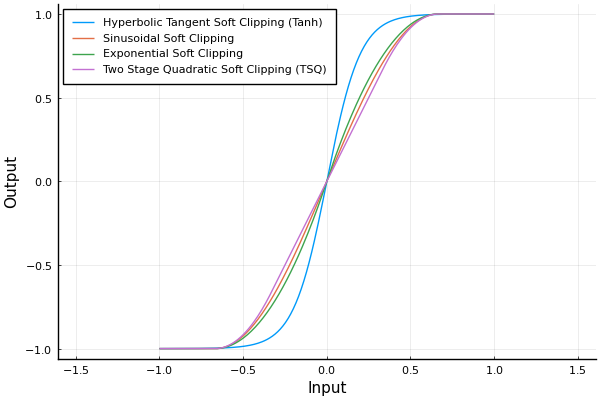

In [6]:
y = zero(x);
for n = 1:length(x)
    if abs.(x[n]) > 2/3
        y[n] = sign.(x[n]);
    elseif abs.(x[n]) >= 1/3
        y[n] = sign.(x[n]) * (3 - (2 - abs.(3*x[n])) .^ 2) / 3;
    else
        y[n] = 2 * x[n];
    end
end
plot!(x, y,
    xlabel="Input", ylabel="Output", aspectratio=1,
    label="Two Stage Quadratic Soft Clipping (TSQ)")

## Cubic Soft Clipping

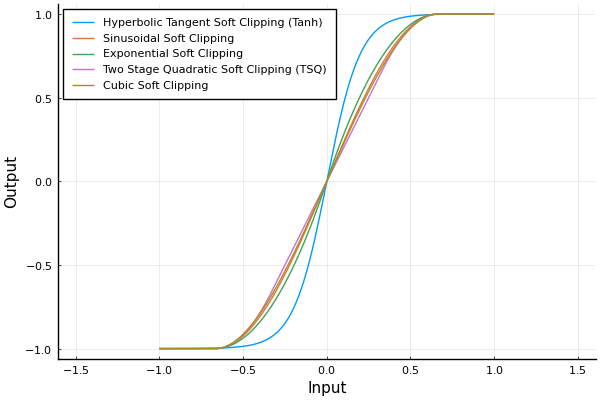

In [7]:
y = zero(x);
for n = 1:length(x)
    if abs.(x[n]) > 2/3
        y[n] = sign.(x[n]);
    else
        y[n] = 9*x[n]/4 - 27*x[n]^3/16;
    end
end
plot!(x, y,
    xlabel="Input", ylabel="Output", aspectratio=1,
    label="Cubic Soft Clipping")

## Reciprocal Soft Clipping

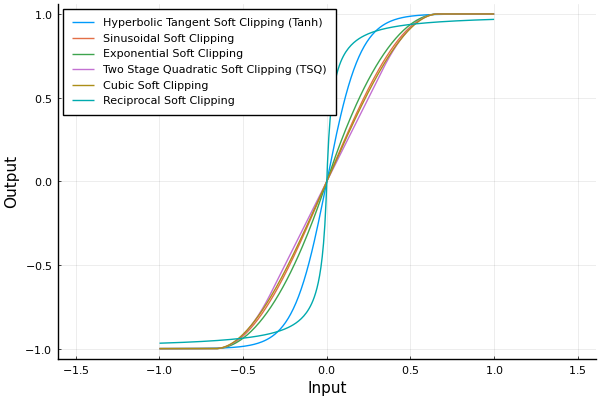

In [8]:
y = sign.(x) .* (1 .- 1 ./ (abs.(30x) .+ 1));
plot!(x, y,
    xlabel="Input", ylabel="Output", aspectratio=1,
    label="Reciprocal Soft Clipping")